In [31]:
from src.char_map import char_map, index_map
from src.models import model_2

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=1,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_2"
model.load_weights('models/' + model_name + '.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000      
__________

In [8]:
from src.train import train

train(input_to_softmax=model, model_name=model_name, spectrogram=False, epochs=40)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         338250    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         375750    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000      
__________

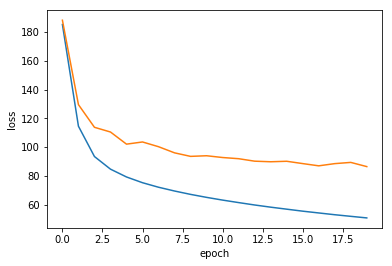

In [2]:
from src.plot import plot_hist

model_name = "model_2"
plot_hist(model_name)

In [6]:
from src.predict import predict
%matplotlib inline

predict(1, 'train', model)

True transcription:

ወሬው ን ወሬ ያደረጉ ምስጢረ ኞች ናቸው
--------------------------------------------------------------------------------
Predicted transcription:

ወሬ<SPACE>ውድ<SPACE>ወሬ<SPACE>ያደጉ<SPACE>ምስጥረኞች<SPACE>ናቸው
--------------------------------------------------------------------------------


39

In [11]:
from src.predict import predict
%matplotlib inline

predict(100, 'train', model)

True transcription:

ከ ተመላሽ ኢትዮጵያውያ ን የ ሚገኘው መረጃ እስረኞቹ ግፍ ና በደል እየ ተፈጸመባቸው ነው የሚ ል መሆኑን አስ ታውቋል
--------------------------------------------------------------------------------
Predicted transcription:

ከተመላሽ<SPACE>ትኢትዮጵያ<SPACE>ያውያን<SPACE>የሚገኘው<SPACE>መረጃ<SPACE>እስረኞቹ<SPACE>ግፍ<SPACE>ና<SPACE>በ<SPACE>ደልተፈጸምባቸው<SPACE>ናው<SPACE>የሚ<SPACE>ል<SPACE>መሆና<SPACE>አስ<SPACE>ታውቋል
--------------------------------------------------------------------------------


115

In [8]:
from src.predict import predict
%matplotlib inline

predict(2, 'validation', model)

True transcription:

ይህንን ም ባድመን ና ሽራሮ ን በ መውረር እ ውን አ ርጓል
--------------------------------------------------------------------------------
Predicted transcription:

ይህን<SPACE>ን<SPACE>አድመን<SPACE>ናሽራ<SPACE>ን<SPACE>በመሁራር<SPACE>ጠው<SPACE>አቋንህ
--------------------------------------------------------------------------------


59

In [3]:
from src.predict import predict
%matplotlib inline

predict(5, 'validation', model)

True transcription:

አጠቃላይ ወጪው አስራ ስምንት ሺ ዶላር እንደሆነ ለማወቅ ተችሏል
--------------------------------------------------------------------------------
Predicted transcription:

አተቃመ<SPACE>አይወጪ<SPACE>አራስ<SPACE>ተሺ<SPACE>ደውላር<SPACE>እንዳሆነላ<SPACE>ማህወቅ<SPACE>ከርችሏ<SPACE>ል
--------------------------------------------------------------------------------


69

In [1]:
from src.data_generator import data_gen
from src.data_generator import VALID_LENGTH
from src.predict import predict
import time

def get_wer():
    start = time.time()
    def wer_single(i):
        wer = predict(i, 'validation', model, verbose=False)
        print(wer)
        if (i%10==0) and i>0:
            print("processed %d in %d minutes" % ((i-1), ((time.time() - start)/60)))
        return wer
    wer = list(map(lambda i: wer_single(i), range(0, VALID_LENGTH)))
    print("Total time: %f" % ((time.time() - start)/60))
    return wer

wer = get_wer()

Using TensorFlow backend.


AttributeError: 'builtin_function_or_method' object has no attribute 'time'